# Bias in Word Embeddings

Word embeddings can capture and reinforce societal biases from their training data through the geometric relationships between word vectors. These relationships often reflect stereotypes about gender, race, age and other social factors. We'll examine how semantic axes help analyze gender bias in job-related terms, showing both the benefits and risks of word embeddings capturing these real-world associations {footcite}`bolukbasi2016debiasing`.

SemAxis is a powerful tool to analyze gender bias in word embeddings by measuring word alignments along semantic axes {footcite}`kwak2021frameaxis`. Using antonym pairs like "she-he" as poles, it quantifies gender associations in words on a scale from -1 to 1, where positive values indicate feminine associations and negative values indicate masculine as ones.

Let's start with a simple example of analyzing gender bias in occupations.

In [1]:
import numpy as np
from gensim.downloader import load

# Load word vectors
vectors = load('word2vec-google-news-300')

def compute_bias(word, microframe):
    word_vector = vectors[word]
    return np.dot(word_vector, microframe) / (
        np.linalg.norm(word_vector) * np.linalg.norm(microframe)
    )

def analyze(word, pos_word, neg_word):
    if word not in vectors:
        return 0.0
    microframe = vectors[pos_word] - vectors[neg_word]
    bias = compute_bias(word, microframe)
    return bias

We will use the following occupations:

In [2]:
# Occupations from the paper
she_occupations = [
    "homemaker", "nurse", "receptionist", "librarian", "socialite",
    "hairdresser", "nanny", "bookkeeper", "stylist", "housekeeper",
]

he_occupations = [
    "maestro", "skipper", "protege", "philosopher", "captain",
    "architect", "financier", "warrior", "broadcaster", "magician",
    "boss"
]

We measure the gender bias in these occupations by measuring how they align with the "she-he" axis.

In [3]:
# Analyze gender bias in occupations
print("Gender Bias in Occupations (she-he axis):")
print("\nShe-associated occupations:")
for occupation in she_occupations:
    bias = analyze(occupation, "she", "he")
    print(f"{occupation}: {bias:.3f}")

print("\nHe-associated occupations:")
for occupation in he_occupations:
    bias = analyze(occupation, "she", "he")
    print(f"{occupation}: {bias:.3f}")

Gender Bias in Occupations (she-he axis):

She-associated occupations:
homemaker: 0.360
nurse: 0.333
receptionist: 0.329
librarian: 0.300
socialite: 0.310
hairdresser: 0.307
nanny: 0.287
bookkeeper: 0.264
stylist: 0.252
housekeeper: 0.260

He-associated occupations:
maestro: -0.203
skipper: -0.177
protege: -0.148
philosopher: -0.155
captain: -0.130
architect: -0.151
financier: -0.145
warrior: -0.120
broadcaster: -0.124
magician: -0.110
boss: -0.090


## Stereotype Analogies

Since word embeddings capture semantic relationships learned from large text corpora, they inevitably encode societal biases and stereotypes present in that training data. We can leverage this property to identify pairs of words that exhibit stereotypical gender associations. By measuring how different words align with the gender axis (she-he), we can find pairs where one word shows a strong feminine bias while its counterpart shows a masculine bias, revealing ingrained stereotypes in language use.

In [4]:
# Stereotype analogies from the paper
stereotype_pairs = [
    ("sewing", "carpentry"),
    ("nurse", "surgeon"),
    ("softball", "baseball"),
    ("cosmetics", "pharmaceuticals"),
    ("vocalist", "guitarist")
]

print("\nAnalyzing Gender Stereotype Pairs:")
for word1, word2 in stereotype_pairs:
    bias1 = analyze(word1, "she", "he")
    bias2 = analyze(word2, "she", "he")
    print(f"\n{word1} vs {word2}")
    print(f"{word1}: {bias1:.3f}")
    print(f"{word2}: {bias2:.3f}")


Analyzing Gender Stereotype Pairs:

sewing vs carpentry
sewing: 0.302
carpentry: -0.028

nurse vs surgeon
nurse: 0.333
surgeon: -0.048

softball vs baseball
softball: 0.260
baseball: -0.066

cosmetics vs pharmaceuticals
cosmetics: 0.331
pharmaceuticals: -0.011

vocalist vs guitarist
vocalist: 0.140
guitarist: -0.041


## Indirect Bias Analysis

Indirect bias occurs when seemingly neutral words or concepts become associated with gender through their relationships with other words. For example, while "softball" and "football" are not inherently gendered terms, they may show gender associations in word embeddings due to how they're used in language and society.

We can detect indirect bias by:
1. Identifying word pairs that form a semantic axis (e.g., softball-football)
2. Measuring how other words align with this axis
3. Examining if alignment with this axis correlates with gender bias

This reveals how gender stereotypes can be encoded indirectly through word associations, even when the words themselves don't explicitly reference gender.

Let's see how this works in practice. We first measure the gender bias of the following words:

In [5]:
# Words associated with softball-football axis
softball_associations = [
    "pitcher", "bookkeeper", "receptionist",
    "nurse", "waitress"
]

football_associations = [
    "footballer", "businessman", "pundit",
    "maestro", "cleric"
]

# Analyze bias along both gender and sports axes
import matplotlib.pyplot as plt

# Calculate biases for all words
gender_biases = []
sports_biases = []
words = softball_associations + football_associations

for word in words:
    gender_bias = analyze(word, "she", "he")
    sports_bias = analyze(word, "softball", "football")
    gender_biases.append(gender_bias)
    sports_biases.append(sports_bias)

Let's plot the results:

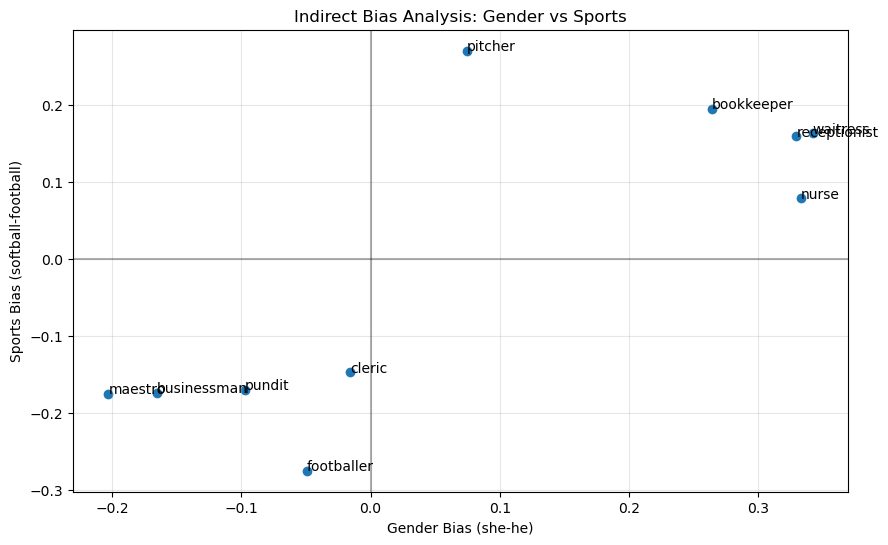


Indirect Bias Analysis (Numerical Results):

pitcher:
Gender bias: 0.075
Sports bias: 0.270

bookkeeper:
Gender bias: 0.264
Sports bias: 0.195

receptionist:
Gender bias: 0.329
Sports bias: 0.159

nurse:
Gender bias: 0.333
Sports bias: 0.079

waitress:
Gender bias: 0.342
Sports bias: 0.163

footballer:
Gender bias: -0.049
Sports bias: -0.275

businessman:
Gender bias: -0.166
Sports bias: -0.174

pundit:
Gender bias: -0.097
Sports bias: -0.170

maestro:
Gender bias: -0.203
Sports bias: -0.175

cleric:
Gender bias: -0.016
Sports bias: -0.147


In [6]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gender_biases, sports_biases)

# Add labels for each point
for i, word in enumerate(words):
    plt.annotate(word, (gender_biases[i], sports_biases[i]))

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.xlabel('Gender Bias (she-he)')
plt.ylabel('Sports Bias (softball-football)')
plt.title('Indirect Bias Analysis: Gender vs Sports')

# Add grid for better readability
plt.grid(True, alpha=0.3)
plt.show()

# Print numerical results
print("\nIndirect Bias Analysis (Numerical Results):")
for i, word in enumerate(words):
    print(f"\n{word}:")
    print(f"Gender bias: {gender_biases[i]:.3f}")
    print(f"Sports bias: {sports_biases[i]:.3f}")


### Exercise

1. **Stereotype Analysis**
   - Question: Which analogies reveal societal stereotypes?
   - Task: Create new analogy pairs and validate them against human judgments
   - Analysis: Compare stereotypical vs. definitional gender associations

2. **Indirect Bias Discovery**
   - Question: How do seemingly neutral word pairs encode gender bias?
   - Task: Find new word pairs like softball-football that show indirect bias
   - Analysis: Measure correlation between direct and indirect bias

```{footbibliography}
```